In [70]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.spatial.distance import cdist
import time
from collections import Counter
# from numba import double
# from numba.decorators import jit, autojit

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

trainDataFrame = train
trainDataLabels = trainDataFrame[trainDataFrame.columns[0]]
testDataFrame = test


In [66]:
def predict(trainDataSets, testData, labels, k, n):
    dists = cdist(testData, trainDataSets, 'euclidean')
    lookup = np.matrix.argsort(dists)
    prediction = []
    rangeArray = np.arange(k)
    for j in xrange (n):
        potentialLabels = [labels[lookup[j][i]] for i in rangeArray]
        res = Counter(potentialLabels)
        value, count = res.most_common(1)[0]
        prediction.append(value)
    print prediction




In [67]:
def knn_main(n,k):
    train_forKNN = np.array(trainDataFrame.ix[:, 1:])
    test_forKNN = np.array(testDataFrame.ix[:n,:])

    label = predict(train_forKNN, test_forKNN, trainDataLabels, k, n)

knn_main(100,5)
    

C:\Users\fredz\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\Users\fredz\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 8, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4]


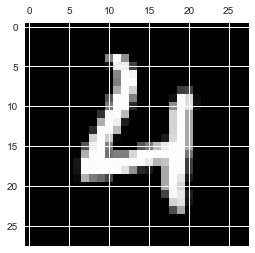

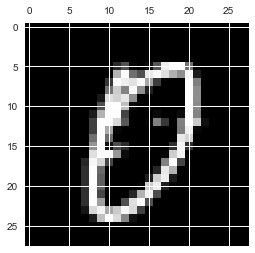

In [71]:
train_shape = train.drop(['label'], axis = 1)
train_label = train['label']

train_shape_matrix = train_shape.as_matrix()

def show_image(n):
    print "Label:", train_label[n]
    plt.matshow(train_shape_matrix[n].reshape(28,28), cmap='gray')
    
interact(show_image, n=(0, 41999));

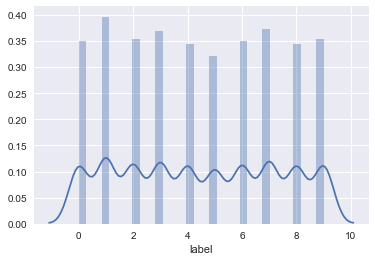

In [72]:
sns.distplot(train_label)

In [73]:
total_observation = len(train_label)

train_label.value_counts(ascending=True)

5    3795
8    4063
4    4072
0    4132
6    4137
2    4177
9    4188
3    4351
7    4401
1    4684
Name: label, dtype: int64